![CEE Masthead](http://kyrill.ias.sdsmt.edu/wjc/eduresources/CEE_284_Masthead.png)
# Part 3 : Symbolics and STEM Libraries: SymPy and SciPy


Last time we explored working with plotting and also working with the basic math-and-array library for python.  

Today we are going to get a little more abstract with two libraries that manage advance math.  This will also empower us to be able to attack Roots and Matrices.   

These two libraries are

[SciPy](https://scipy.org/scipylib/index.html) : A set of resources for linear algebra, statistics, and differentiation/integration.
[SymPy](https://www.sympy.org/en/index.html) : A symbolic computer algebra system (which does a few things that we’ve done with Mathcad.

We’ll start by exploring SymPy and then move forward with some tricks in SciPy.  This will then have us ready to start attacking some of our past homework assignments the “python” way.  

## Loading the Libraries

Let's start by loading up a set of libraries that we'll be working with today.

Along with the above two libraries we'll be digging out NumPy and Matplotlib.

Let's call our four libraries using the handle system to "grab" them when we run our program.

In [1]:
##########################################################
#
# Library Calls.
#

import numpy             as np
import matplotlib.pyplot as plt

# loading sympy

import sympy             as sym

# For SciPy, there are some modules that you will need to
#    explicitly pull (rather like the pyplot area 
#    of matplotlib)

import scipy             as sci     # basic scipy 
import scipy.integrate   as sciint  # integration tools
import scipy.optimize    as sciopt  # optimization tools (for roots)
import scipy.linalg      as scilina # linear algebra tools 
import scipy.misc        as scimisc # some other tools (includes derivatives)
 


#
##########################################################

## Sympy Play


### Starting with Making a Variable
Variables in symbolic math solvers be it with Python or also with MATLAB are handled differently than an ordinary variable or array.  

To play in SymPy, we create a variable (or symbol).  This will be independant of the numpy library we worked with last session as will alot of things we'll be doing in this part of today's exercise.   

To access the the function to create a variable, just as we did with the numpy library, we invoke the library and then the symbols() function.  The documentation for it is here:  [sympy.symbols](https://docs.sympy.org/latest/modules/core.html#sympy.core.symbol.symbols).


In [2]:
################################################################
#
# Let's make a x and y for use in symbolic solutions
#

x = sym.symbols('x')
y = sym.symbols('y')

#
################################################################

### A Little Calc-Fu

Now let's test this with something simple:  Let's do a very simple derivative using the [sympy.diff](https://docs.sympy.org/latest/modules/core.html#sympy.core.function.diff) function:  

$$ \frac{d}{dx}\left(x^2 - 3 x + 2 \right) $$

In [3]:
################################################################
#
# Demonstrating how differentiate
#  a very simple math function
#

sym.diff(x**2 - 3 * x + 2,  # we write the function.... 
         x)                 # and we're differentiating by "x"

#
################################################################

2*x - 3

Ooooo... Pretty.  If you look closely the font is different than the normal python output.  That's acutally HTML in Jupyter.  (It's not as pretty if you have to work in a boring terminal.  Indeed the results can be so ugly that I avoided SymPy before working with Jupyter Notebooks.  

OK now let's try this one (more relevant to what we are doing above with pi!)...

$$ \frac{d}{dx}\left( 4  \arctan{x} \right) $$

(Note that we will need to use SymPy's version of any math function that you'd otherwise use from the NumPy python library where you'd normally do your number-crunching.)

In [4]:
################################################################
#
# Demonstrating how differentiate
#  using a basic math function 
#

sym.diff( 4 * sym.atan(x), x)

#
################################################################

4/(x**2 + 1)

still pretty.

Bet you can guess what we do next:

We can symbolically integrate as well... (We'll use SciPy for this shortly.)  Such as the one from our pi example.  The function for symbolic integration, while accessable from the "root" sympy library area is [sympy.integrals.integrals.integrate](https://docs.sympy.org/latest/modules/integrals/integrals.html#sympy.integrals.integrals.integrate)

$$ \int {\frac{4}{1 + x^2}}dx  $$

In [5]:
################################################################
#
# Demonstrating how integrate a function 
#

sym.integrate(  4 / (1 + x*x), # our function
                x)             # the value overwhich we'll integrate
#
################################################################

4*atan(x)

And we can request specific ranges for our integral!

$$ \int_{0}^{1} {\frac{4}{1 + x^2}}dx  $$

In [6]:
################################################################
#
# Demonstrating how integrate a function 
#   over a range (this time the last one is inclusive)
#

sym.integrate(  4 / (1 + x*x), # our function
                (x, 0, 1) )    # the value and limits over 
                               #   which we'll integrate

#
################################################################

pi

(Honestly the first time I did this on Jupyter, I was expecting the equivalent of np.pi!)

### Simple Root-Fu!

We'll play rough with roots with SciPy shortly as well... but let's do a little Sympi fun first.

Let's try a basic quadradic equation!  Here we can pretend that we've already slammed all of our terms on one side of the equal sign.

$$ f(x) = x^2 - 3 x + 2 $$

(This is one the school board would allow Mrs Mercer to give you in Middle School and it's easy to factor without fighting with or having to remember the quadradic equation song.)

But remember... what do we do first? 

Yup, we plot it!

SymPy has a separate [plotting library](https://docs.sympy.org/latest/modules/plotting.html) using elements from matplotlib comes in handy here... You can also zero in on your x-range in a way that is similar to the above calculus integration method!  The default, like Mathcad, is to plot x from -10 to +10.

/usr/local/lib/python3.7/site-packages/sympy/plotting/plot.py:1065: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['left'].set_smart_bounds(True)
/usr/local/lib/python3.7/site-packages/sympy/plotting/plot.py:1066: MatplotlibDeprecationWarning: 
The set_smart_bounds function was deprecated in Matplotlib 3.2 and will be removed two minor releases later.
  self.ax[i].spines['bottom'].set_smart_bounds(False)


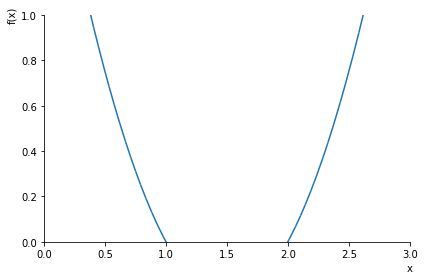

In [7]:
################################################################
#
# Showing how to plot a function using 
#   the SymPy package (and how to plot it
#   over a range where x is bounded between 
#   0 and 3).
#

sym.plotting.plot(x**2 - 3*x + 2, # here is our function
                  (x, 0, 3))      # and our x axis 
                                  # is set from 0 to 3)

#
################################################################



For a more complicated problem you could now fetch a couple values on the x axis for first guesses of your root!

But let's try this function below to solve the system using [sympy.solve](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=sympy.solve#sympy.solvers.solvers.solve).

In [8]:
################################################################
#
# Demonstrating the Sym.Solve Function
#

sym.solve(x**2 - 3*x + 2, # our function
                       x) # solve for x. (stick a pin in this one!)

#
################################################################

[1, 2]

And we can have a little more fun (if you think flashbacks back to Mrs Mercer's Algebra class is "fun.") with [sympy.factor](https://docs.sympy.org/latest/modules/polys/reference.html?highlight=factor#sympy.polys.polytools.factor)

In [9]:
################################################################
#
# Showing-off the Factoring Function
#

sym.factor(x**2 - 3*x + 2, # our function
                        x) # solve for x

#
################################################################

(x - 2)*(x - 1)

We can also do a bounded root solution (For a simple nonlinear equation, it's defaulting to the secant method. It can also manage oversolved / overdetermined systems.).  Here we use [sympy.nsolve](https://docs.sympy.org/latest/modules/solvers/solvers.html?highlight=nsolve#sympy.solvers.solvers.nsolve).

In [10]:
################################################################
#
# Showing-off the Nsolve Function
#

sym.nsolve((x**2 - 3*x + 2), # our function
                          x, # solve for x
                   [0, 1.5]) # between these bounds

#
################################################################

1.00000000000000

In [11]:
################################################################
#
# Showing-off the Nsolve Function WITH verbose output
#

sym.nsolve((x**2 - 3*x + 2), # our function
                          x, # solve for x
                   [0, 1.5], # between these bounds
             verbose = True) # and show us the details of our proceedures!

#
################################################################

x:     1.33333333333333333333
error: 1.5
x:     -2.09640654445439333919e-20
error: 0.166666666666666666667
x:     1.2
error: 1.33333333333333333335
x:     1.11111111111111111111
error: 1.20000000000000000002
x:     0.967741935483870967741
error: 0.0888888888888888888884
x:     1.00389105058365758755
error: 0.143369175627240143372
x:     1.00012205541315757354
error: 0.0361491150997866198078
x:     0.999999523162614423091
error: 0.00376899517050001401046
x:     1.00000000005820766091
error: 0.000122532250543150447253
x:     1.00000000000000002776
error: 4.76895593237818942725e-7
x:     1.0
error: 5.82076331545036598086e-11
x:     1.0
error: 2.77555756156289135106e-17


1.00000000000000

In [12]:
################################################################
#
# MORE Showing-off the Nsolve Function WITH verbose output
#

sym.nsolve((x**2 - 3*x + 2), # our function
                          x, # solve for x
                   [0, 1.5], # between these bounds
             verbose = True) # and show us the details of our proceedures!

#
################################################################

x:     1.33333333333333333333
error: 1.5
x:     -2.09640654445439333919e-20
error: 0.166666666666666666667
x:     1.2
error: 1.33333333333333333335
x:     1.11111111111111111111
error: 1.20000000000000000002
x:     0.967741935483870967741
error: 0.0888888888888888888884
x:     1.00389105058365758755
error: 0.143369175627240143372
x:     1.00012205541315757354
error: 0.0361491150997866198078
x:     0.999999523162614423091
error: 0.00376899517050001401046
x:     1.00000000005820766091
error: 0.000122532250543150447253
x:     1.00000000000000002776
error: 4.76895593237818942725e-7
x:     1.0
error: 5.82076331545036598086e-11
x:     1.0
error: 2.77555756156289135106e-17


1.00000000000000

In [13]:
################################################################
#
# EVEN MORE Showing-off the Nsolve Function WITH STILL MORE 
#       verbose output
#



sym.nsolve((x**2 - 3*x + 2), # our function
                          x, # solve for x
               [0.50, 0.75], # between these bounds
            solver='secant', # choose your method
             verbose = True) # and show us the details of our proceedures!

#
################################################################

x:     0.928571428571428571429
error: 0.25
x:     0.986486486486486486487
error: 0.178571428571428571429
x:     0.999110320284697508897
error: 0.0579150579150579150581
x:     0.999988148007680091023
error: 0.0126238337982110224101
x:     0.999999989465020465146
error: 0.000877827722982582126238
x:     0.999999999999875140984
error: 0.000011841457340374123107
x:     0.999999999999999999999
error: 1.05348546758382260715e-8
x:     1.0
error: 1.24859014466344197571e-13
x:     1.0
error: 1.05879118406787542384e-21


1.00000000000000

### A Couple Simultaneous Equations, (Root-Style)

Let's now leverage symbolic solutions to do some simple simultaneous equations.

Consider our standard linaer equation pair.

$$f(x,y) = 2x-y+2$$
$$g(x,y) = 2x+y-6$$

recall from our earlier work that 
$$x = 1$$
$$y = 4$$

We'll explore a few elements of this that demonstrate the SymPy features

First we'll need a symbolic symbol for y:

In [14]:
################################################################
#
# Solve the two equations symbolically using the same tool
#

sym.solve([2*x - y + 2,  # our f(x,y) function
           2*x + y - 6], # our g(x,y) function
                   x,y) # solve for x. (stick a pin in this one!)

#
################################################################

{x: 1, y: 4}

We can also prep our equations for plotting

In [15]:
################################################################
#
# Solve the two equations symbolically using the same tool
#

yf = sym.solve(2*x - y + 2, # our g(x,y) function
                    y) # solve for x. (stick a pin in this one!)

yg = sym.solve( 2*x + y - 6, # our g(x,y) function
                     y) # solve for x. (stick a pin in this one!)

print(yf)
print(yg)

#
################################################################

[2*x + 2]
[6 - 2*x]


and we can plot!

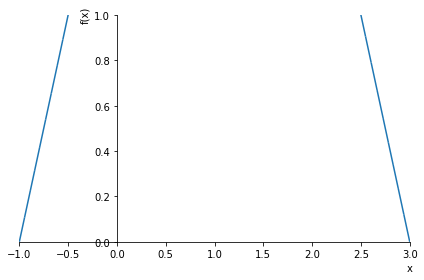

In [16]:
################################################################
#
# Now let's plot two equations at once.
#

sym.plotting.plot(( 2*x + 2), # yf(x)
                  (-2*x + 6), # yg(x)
                    (x,-1,3)) # zoom in on the x axis
                                   

#
################################################################



and now let's do some of these steps in our other library to explore in this session:  SciPy

## Exploring Some Features in SciPy

We'll mirror some of our earier work from above 

Let's start with our arctangent-pi play from above.

$  f(x) = \frac{4}{1+x^2} $

Here is how we express this in a [function](https://docs.python.org/3/tutorial/controlflow.html#defining-functions) in Python. (You can also do this with pi from our previous sessions.)

In [17]:
################################################################
#
# let's make a "function" in python
#

def f(x) :
    return(4 / (1 + x**2))

#
################################################################

... and plot it out (As you get braver and more confortable with plotting in python there are tools that make nice and fancy plots, but for now let's keep it basic but with a few simple to make embelishments from last time using horizontal and vertical lines through our x=0 and y=0 axes with [matplotlib.pyplot.axhline](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.axhline.html) and [matplotlib.pyplot.axvline](https://matplotlib.org/3.2.1/api/_as_gen/matplotlib.pyplot.axvline.html#matplotlib.pyplot.axvline)

f(x=0) =  4.0
f(x=1) =  2.0
f(x=2) =  0.8


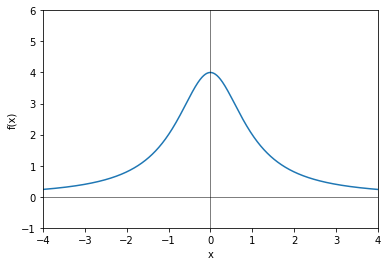

In [18]:
################################################################
#
# testing our function
#

print("f(x=0) = ", f(0))
print("f(x=1) = ", f(1))
print("f(x=2) = ", f(2))

#
# replotting the function with matplotlib
#

X = np.arange(-4,4,0.01) 

plt.plot(X, f(X))          # plot x vs f(x)

plt.xlabel("x")            # label your graphs or your
plt.ylabel("f(x)") #  TA will yell at you

plt.ylim(-1,6)             # you can change your axis limits
plt.xlim(-4,4)             #   (it'll take a little trial and error)

#
# (with those axes set you can toss in a pair of 
#  reference lines for your true x and y axes)
#

plt.axhline(        y =   0,     # through the origin
            linewidth = 0.5,     # skinny
                color = 'black') # "paint it black"

plt.axvline(        x =   0,     # through the origin
            linewidth = 0.5,     # skinny
                color = 'black') # "paint it black"
#
################################################################

What's that derivative where x = 1? This will be a quantitative, not symbolic, calculation dervived at a given value on the "number line" using [scipy.misc.derivative](https://docs.scipy.org/doc/scipy/reference/generated/scipy.misc.derivative.html)

In [19]:
################################################################
#
# a simple derivative evaluated at a given value
#

dfdx_of_1 = scimisc.derivative(f, 1.0)

print("f'(1) = ", dfdx_of_1)

#
################################################################

f'(1) =  -1.6


And let's say that our uncertainty of x ($\Delta x$) is 0.01.  Recalling how error propagates.

$$\Delta f = \frac{df}{dx}\Delta x$$ so... 

In [20]:
################################################################
#
# a simple derivative
#

uncertainty_of_x      = 0.01 

uncertainty_of_f_at_1 = scimisc.derivative(f, 1.0) * uncertainty_of_x
uncertainty_of_f_at_0 = scimisc.derivative(f, 0.0) * uncertainty_of_x
uncertainty_of_f_at_5 = scimisc.derivative(f, 5.0) * uncertainty_of_x



print("Δf(1) = ", uncertainty_of_f_at_1 )
print("Δf(0) = ", uncertainty_of_f_at_0 )
print("Δf(5) = ", uncertainty_of_f_at_5 )


#
################################################################

Δf(1) =  -0.016
Δf(0) =  0.0
Δf(5) =  -0.0006359300476947536


### Estimating Integrals

We can also get the area under the curve with a set of [integration functions](https://docs.scipy.org/doc/scipy/reference/integrate.html).

The most basic function for integrating that has worked well for me is [scipy.integrate.quad](https://docs.scipy.org/doc/scipy/reference/integrate.html) (short for the quadrature method of estimating integrals).  

Let's integrate over our test-case function from 0 to 1 which as you recall should be $\pi$

In [21]:
################################################################
#
# a simple integration
#

integral_of_f_from_0_to_1 = sciint.quad(f, # integrate function f
                                        0, #  ... from 0
                                        1) #  ... to 1

print("F(0,1) = ", integral_of_f_from_0_to_1)

#
# (that trailing value in the result is the absolute error of
#  the estimated integral - as you can see this one is effectively
#  zero)
#

print("result without error",integral_of_f_from_0_to_1[0])
#
################################################################

F(0,1) =  (3.1415926535897936, 3.4878684980086326e-14)
result without error 3.1415926535897936


### Roots in SciPy

There are a number of [functions](https://docs.scipy.org/doc/scipy/reference/optimize.html) for optimization (finding the "least bad" result) and root-finding (finding the perfect "zero") in SciPy.  

Since our current f(x) doesn't cut through zero let's make a new function with our earlier quadradic example.

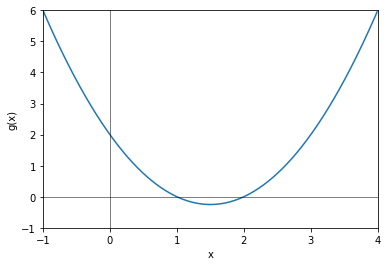

In [22]:
################################################################
#
# let's make another function in python
#

def g(x) :
    return(x**2 - 3*x + 2)

#
# replotting the function with matplotlib
#

X = np.arange(-1,4,0.01) 

plt.plot(X, g(X))          # plot x vs f(x)

plt.xlabel("x")            # label your graphs or your
plt.ylabel("g(x)") #  TA will yell at you

plt.ylim(-1,6)             # you can change your axis limits
plt.xlim(-1,4)             #   (it'll take a little trial and error)

plt.axhline(        y =   0,     # through the origin
            linewidth = 0.5,     # skinny
                color = 'black') # "paint it black"

plt.axvline(        x =   0,     # through the origin
            linewidth = 0.5,     # skinny
                color = 'black') # "paint it black"

#
################################################################

There are a number of root-finding functions (you have to go below the optimization routines on the above link to the area discussing ["root finding"](https://docs.scipy.org/doc/scipy/reference/optimize.html#root-finding)).  You will recognize functions for bisection, newton and sectant methods.... For False Position Brent's and Ridder's methods are "improvements" to the original classic false position scheme.

In [23]:
################################################################
#
# Playing with a Newton Raphson Solver.
#

our_low_root = sciopt.newton(g,-1)

print("low x = ",our_low_root)

# another way to call it.

our_high_root = sciopt.newton(g,10)

print("high x = ",our_high_root)

#
################################################################

low x =  0.9999999999999998
high x =  2.0


In [24]:
################################################################
#
# Playing with a Secant Solver.
#

our_low_root = sciopt.root_scalar(                 g, # func
                                            x0 = 0.0, #  guess
                                            x1 = 0.5, # 2nd guess
                                     method='secant') # method

print(" low x full results = ",our_low_root)      # all results
print()
print("        low x value = ",our_low_root.root) # just the root

print()
print()

#
# Playing with a False Position (Brent's) Solver.
#

our_high_root = sciopt.root_scalar(               g, # function
                                   bracket=[1.5, 4], # this needs a bracket pair
                                    method='brenth') # method (based on False-Position)

print("high x full results = ",our_high_root)      # all results
print()
print("       high x value = ",our_high_root.root) # just the root

#
################################################################

 low x full results =        converged: True
           flag: 'converged'
 function_calls: 9
     iterations: 8
           root: 0.9999999999999998

        low x value =  0.9999999999999998


high x full results =        converged: True
           flag: 'converged'
 function_calls: 12
     iterations: 11
           root: 1.9999999999999383

       high x value =  1.9999999999999383


### Linear Algebra
Both NumPy and SciPy both have linear algebra funcitons.  [Scipy has some spiffier additions](https://docs.scipy.org/doc/scipy/reference/linalg.html) though so I use that when I do matrix-fu.

Let's use our above equations...

$$f(x,y) = 2x-y+2$$
$$g(x,y) = 2x+y-6$$

which creates a matrix system

$$\mathbf{A}=\begin{bmatrix}
2 & -1 \\ 
2 & 1 
\end{bmatrix}  \vec{b}=\begin{bmatrix}
-2\\ 
6
\end{bmatrix}$$

In [25]:
################################################################
#
# Using NumPy to make the array
#

A = np.array([[ 2, -1],
              [ 2,  1]])

b = np.array([[-2], 
              [6]]) 

# you can also make b like this: np.array([-2,6])
#   frequently a 1-d array will be automatically treated
#   like a "vertical" vector in some languates
#
################################################################

With this we can do some basic Matrix Operations... 

In [26]:
################################################################
#
# Calculate Determinant and Inverse
#

det_of_A = scilina.det(A)
inv_of_A = scilina.inv(A)

print("   |A| = ", det_of_A)
print("inv(A) = ", inv_of_A)

#
################################################################

   |A| =  4.0
inv(A) =  [[ 0.25  0.25]
 [-0.5   0.5 ]]


Finally we have the ability to solve matrix systems without an intermediate matix inverse step.

In [27]:
################################################################
#
# Calculate Determinant and Inverse
#

AinvB = scilina.solve(A, b)

print("   x = ", AinvB)

#
################################################################

   x =  [[1.]
 [4.]]


## Final Note

There are a LOT of other resources available in SciPy. Nobody could (or should) try to dig into them all at one setting.  There are also resources for statistics and specialized physics problems but, I will save the former for another session where we replicate your previous assignments.  

# Version Information

In [28]:
################################################################
#
# Loading Version Information
#

%load_ext version_information

%version_information version_information, numpy, sympy, scipy, matplotlib

#
################################################################

Software versions
Python 3.7.7 64bit [Clang 11.0.0 (clang-1100.0.33.17)]
IPython 7.13.0
OS Darwin 19.4.0 x86_64 i386 64bit
version_information 1.0.3
numpy 1.18.2
sympy 1.5.1
scipy 1.4.1
matplotlib 3.2.1
Fri Apr 17 12:53:47 2020 MDT